In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/covid_19_indonesia_time_series_all_clean.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,75
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75
2,2020-03-02,Riau,1,0,0,1,1,0,1
3,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75
4,2020-03-03,Jawa Barat,1,1,0,0,1,1,60


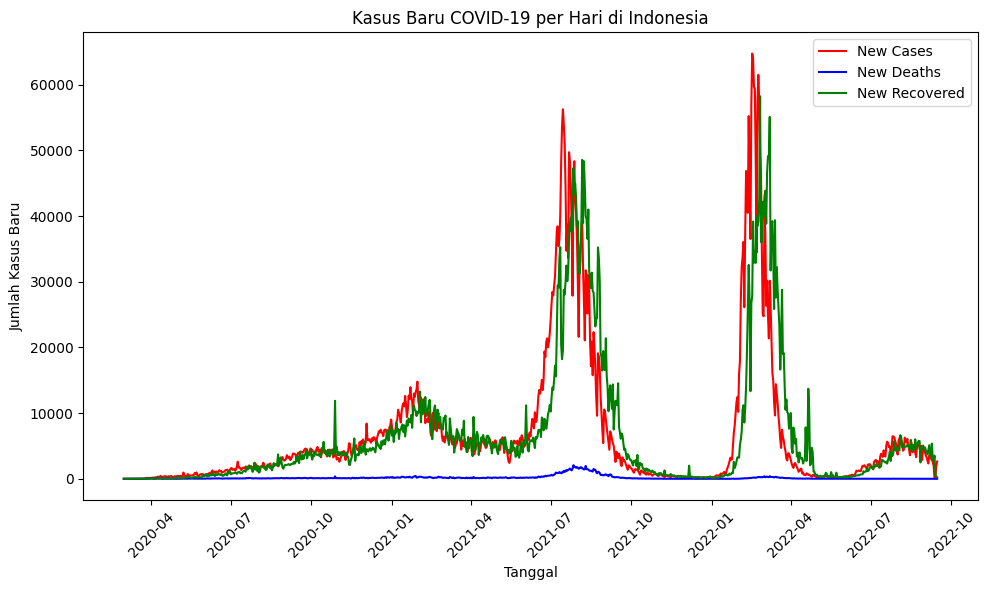

In [3]:
# Grafik Kasus Baru, Kematian Baru, Kesembuhan Baru per Hari
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('Date').sum()

plt.plot(df_grouped.index, df_grouped['New Cases'], label='New Cases', color='red')
plt.plot(df_grouped.index, df_grouped['New Deaths'], label='New Deaths', color='blue')
plt.plot(df_grouped.index, df_grouped['New Recovered'], label='New Recovered', color='green')

plt.title("Kasus Baru COVID-19 per Hari di Indonesia")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Baru")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

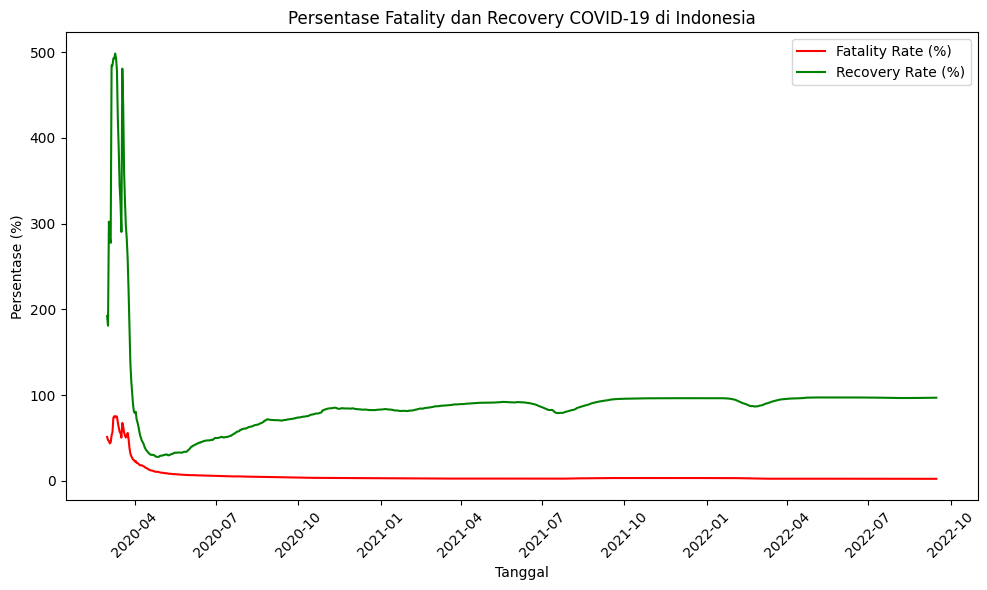

In [6]:
# Menghitung fatality rate dan recovery rate
df_grouped['Fatality Rate (%)'] = (df_grouped['Total Deaths'] / df_grouped['Total Cases']) * 100
df_grouped['Recovery Rate (%)'] = (df_grouped['Total Recovered'] / df_grouped['Total Cases']) * 100

# Plot persentase
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Fatality Rate (%)'], label='Fatality Rate (%)', color='red')
plt.plot(df_grouped.index, df_grouped['Recovery Rate (%)'], label='Recovery Rate (%)', color='green')

plt.title("Persentase Fatality dan Recovery COVID-19 di Indonesia")
plt.xlabel("Tanggal")
plt.ylabel("Persentase (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


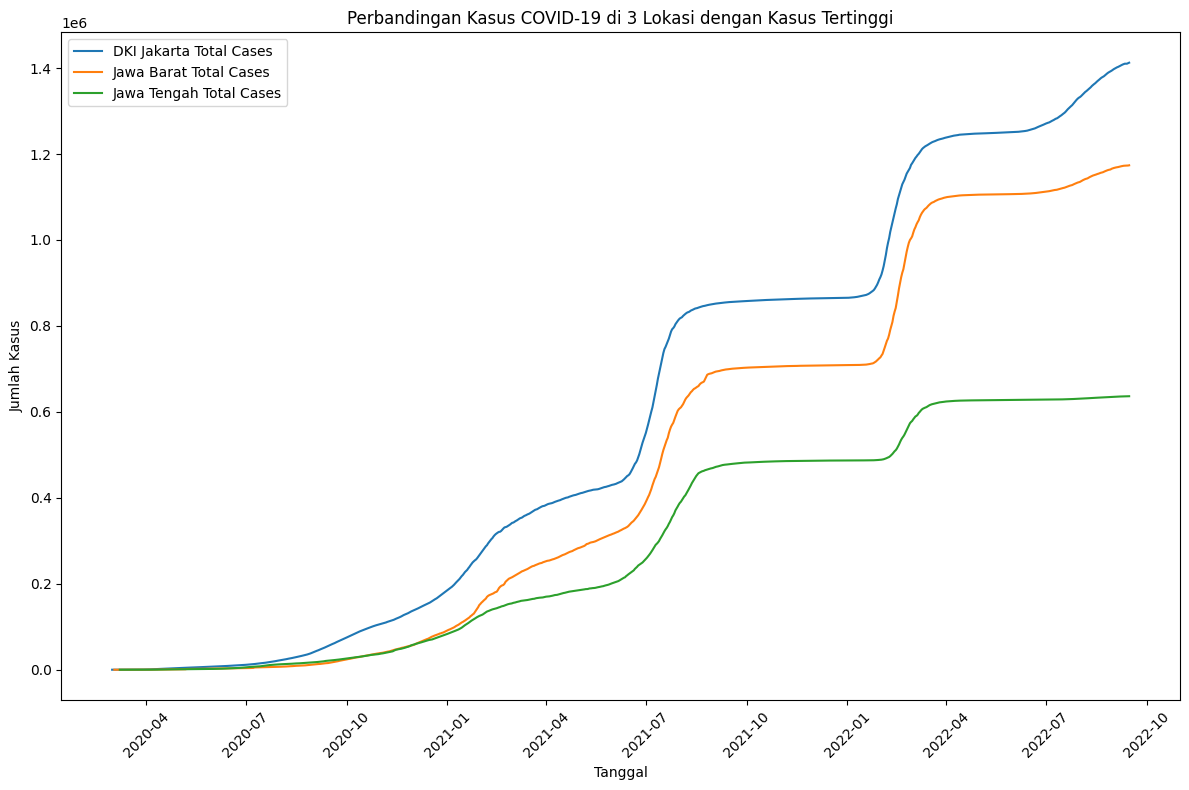

In [7]:
# Memilih 3 lokasi dengan total kasus tertinggi
top_locations = df.groupby('Location')['Total Cases'].max().nlargest(3).index

plt.figure(figsize=(12, 8))
for loc in top_locations:
    df_location = df[df['Location'] == loc]
    df_location_grouped = df_location.groupby('Date').sum()
    plt.plot(df_location_grouped.index, df_location_grouped['Total Cases'], label=f'{loc} Total Cases')

plt.title("Perbandingan Kasus COVID-19 di 3 Lokasi dengan Kasus Tertinggi")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
from seaborn.clustermap import clustermap

# Membuat pivot untuk heatmap
df_pivot = df.pivot_table(values='New Cases', index='Location', columns='Date', aggfunc='sum')
sns.clustermap(df_pivot.fillna(0), cmap='Reds', linewidths=0.5, figsize=(20, 20))

# Plot heatmap
plt.figure(figsize=(200, 150))
sns.heatmap(df_pivot, cmap='Reds', linewidths=0.5)
plt.title("Distribusi Kasus Harian COVID-19 di Lokasi-Lokasi")
plt.xlabel("Tanggal")
plt.ylabel("Lokasi")
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn.clustermap'

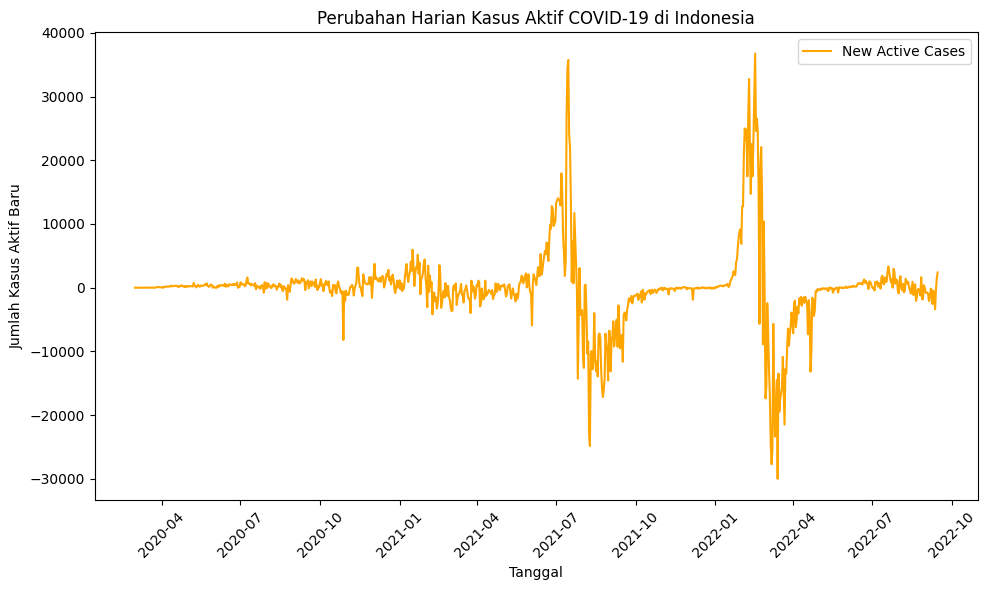

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['New Active Cases'], label='New Active Cases', color='orange')

plt.title("Perubahan Harian Kasus Aktif COVID-19 di Indonesia")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Aktif Baru")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


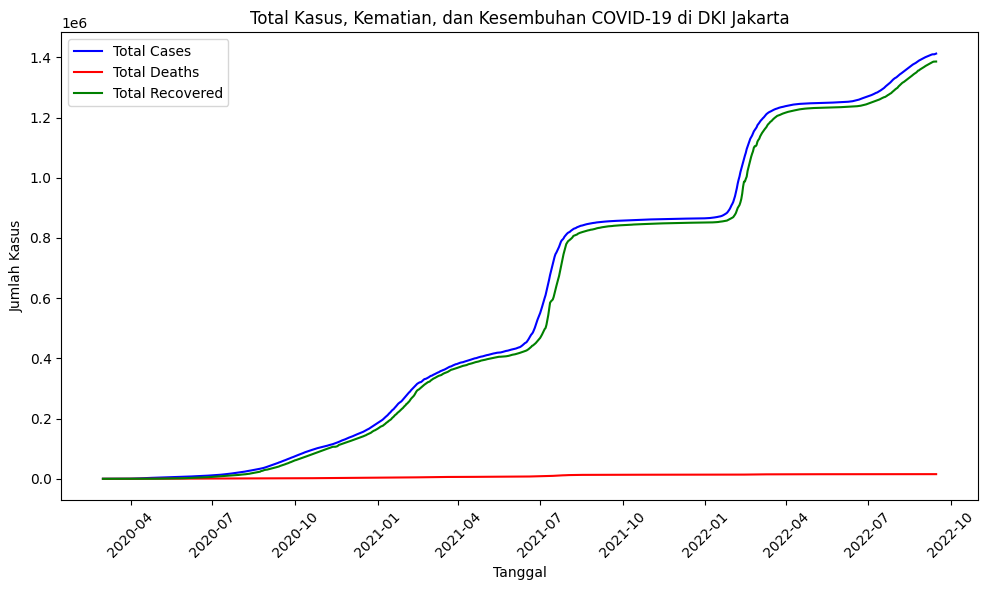

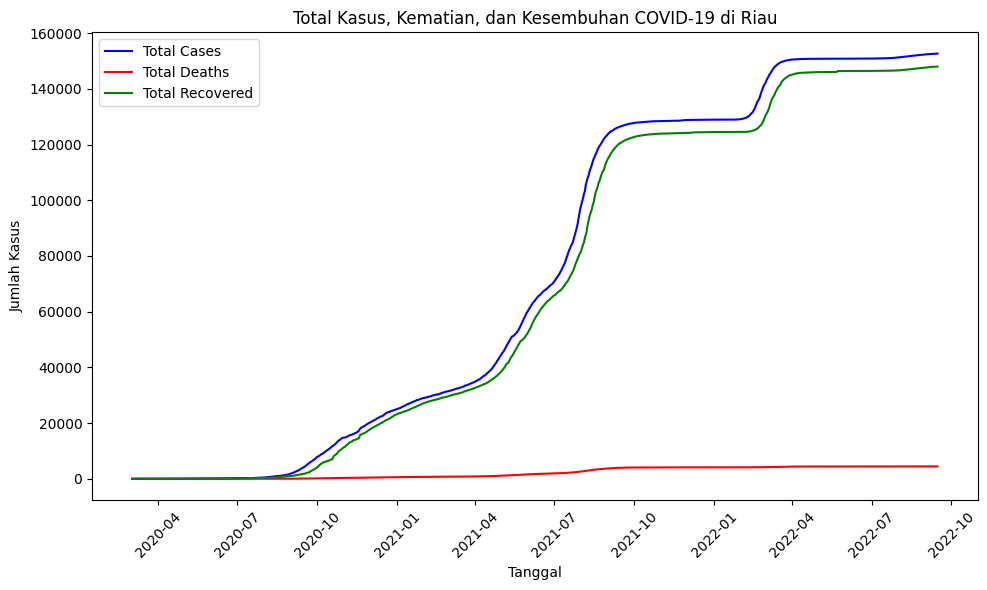

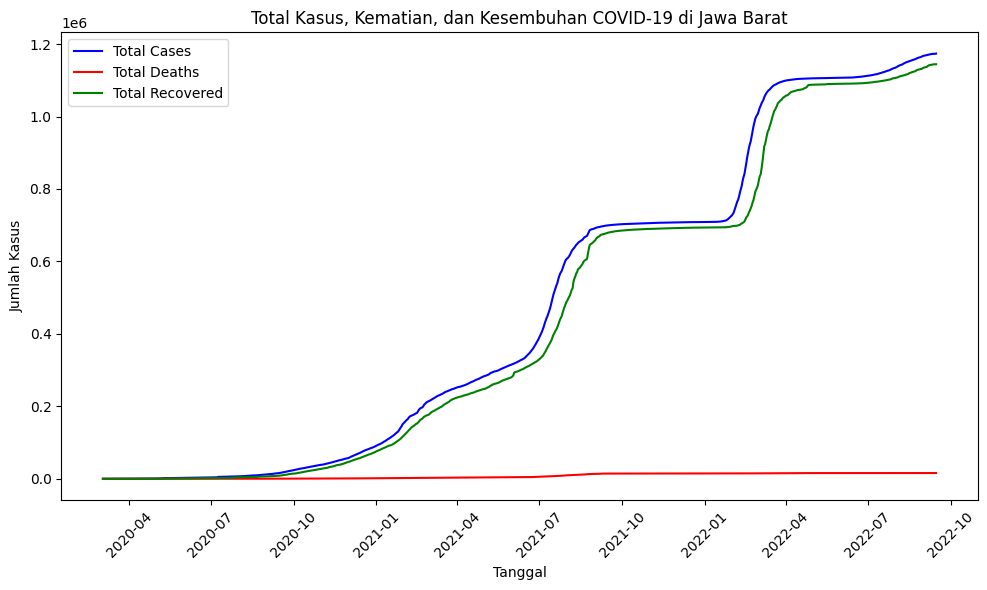

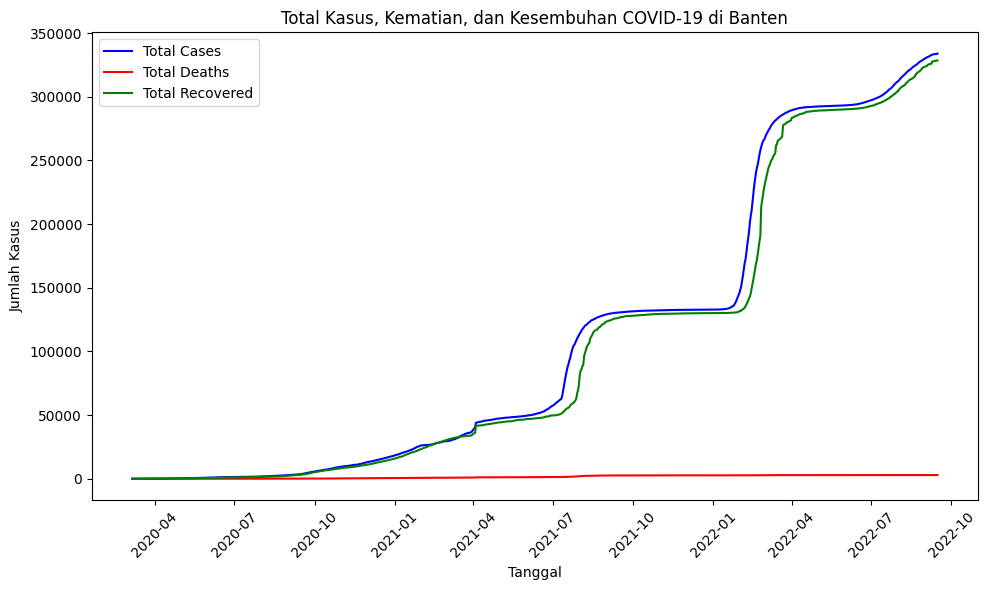

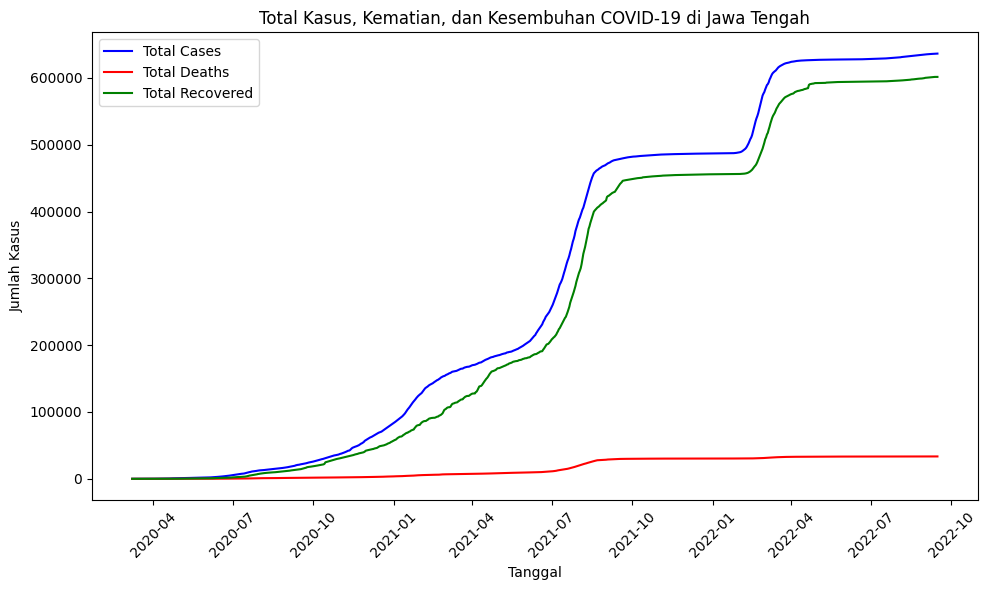

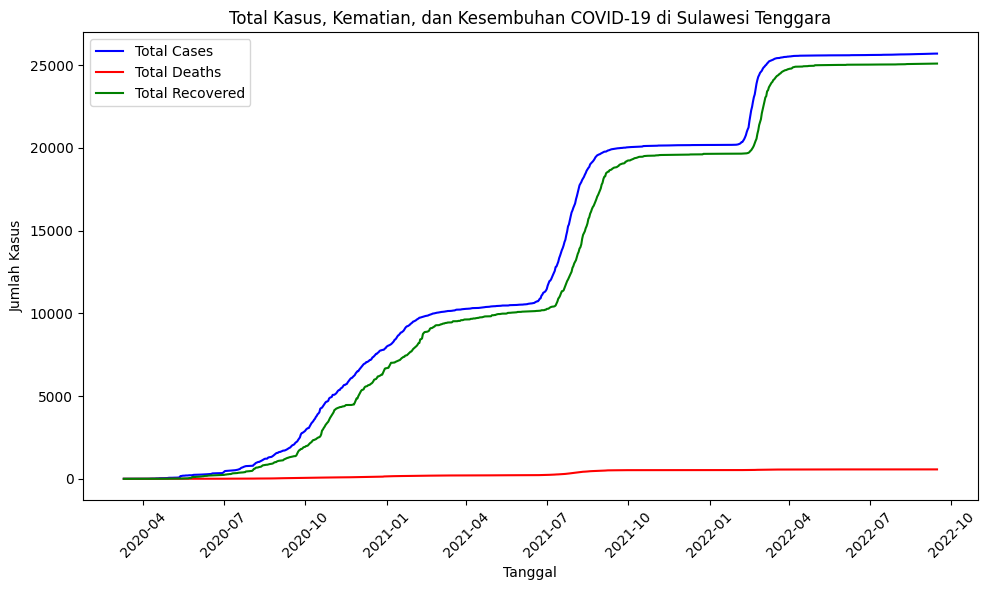

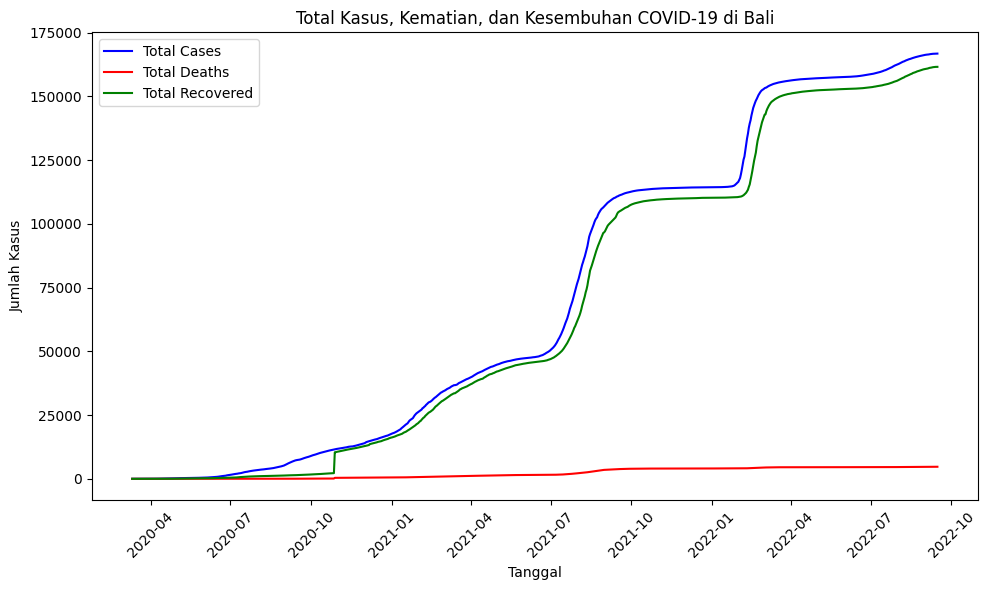

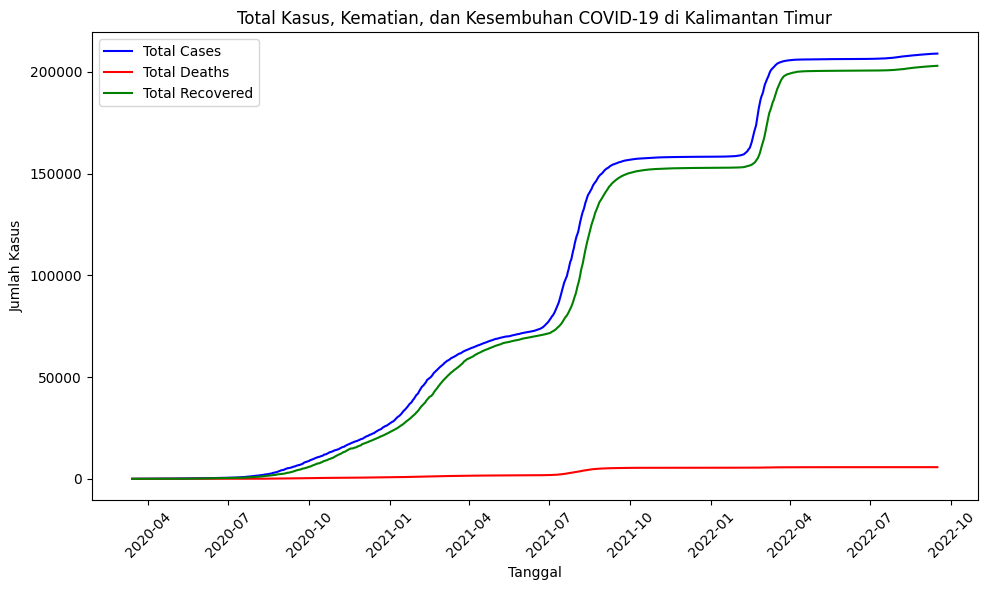

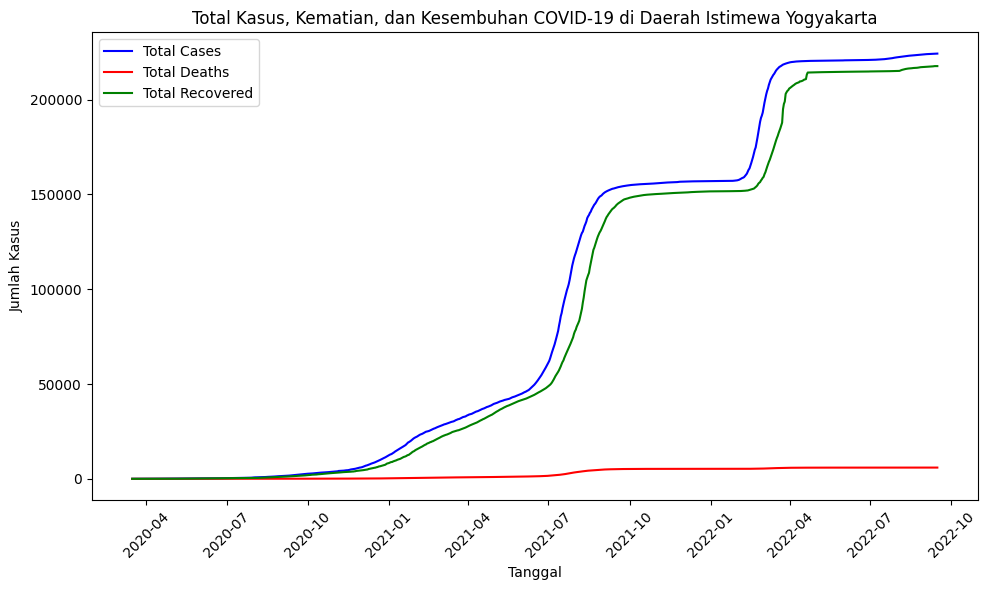

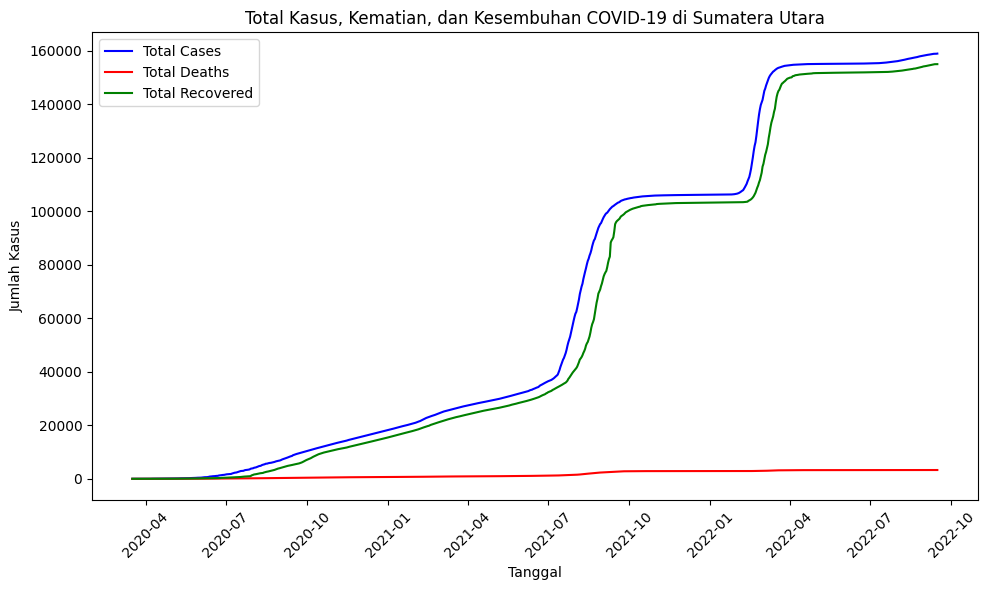

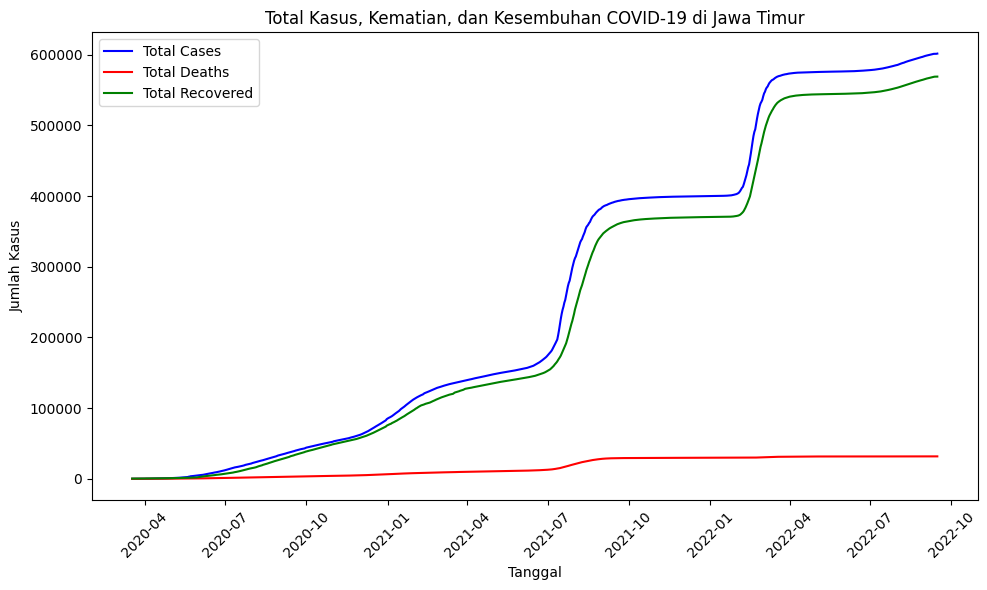

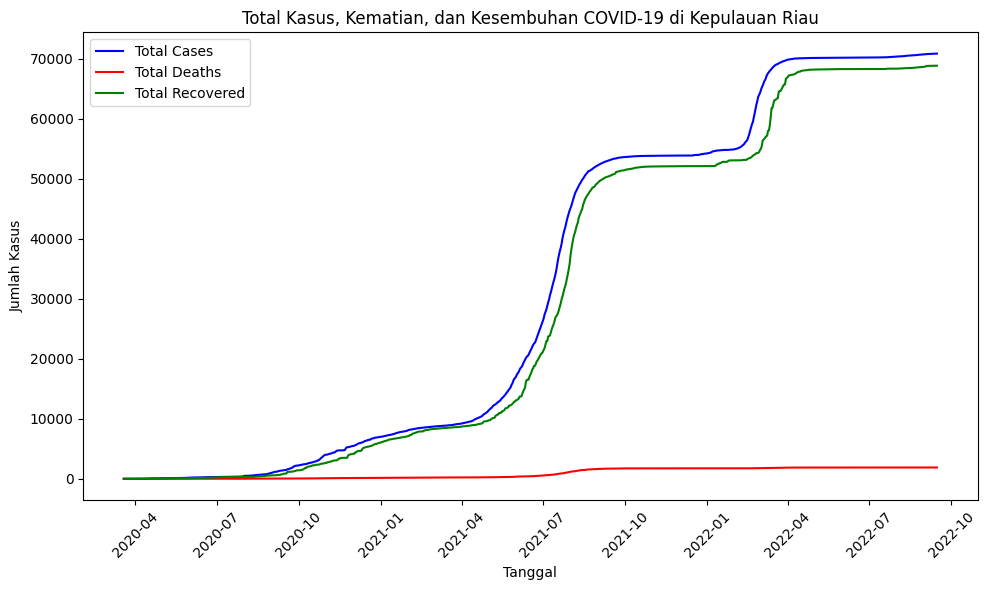

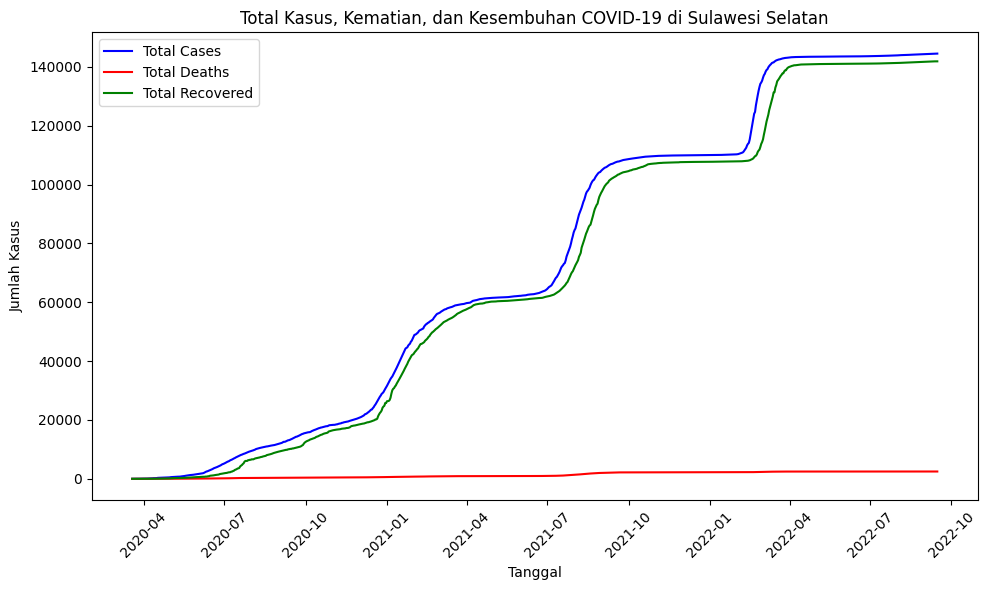

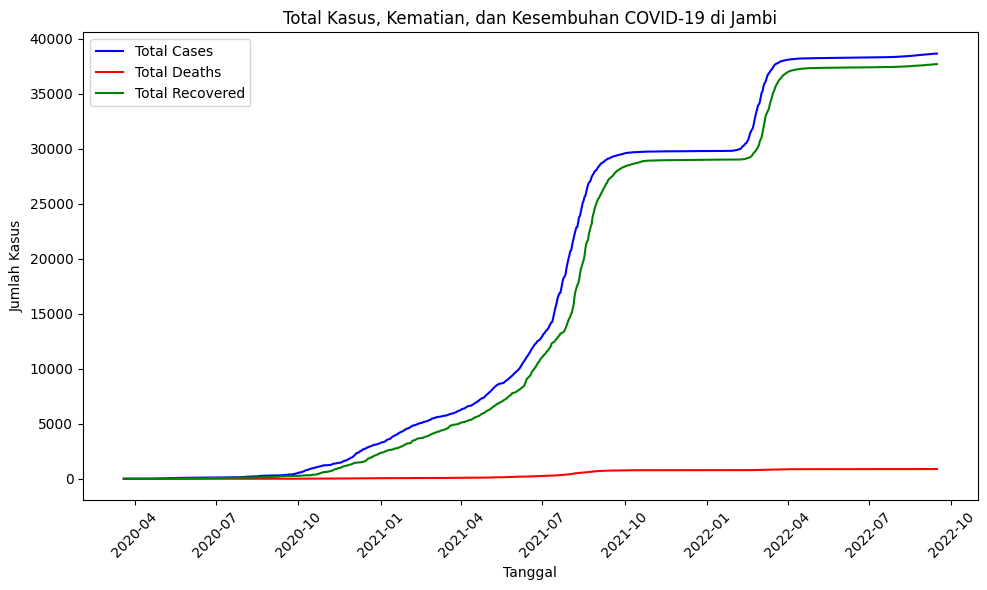

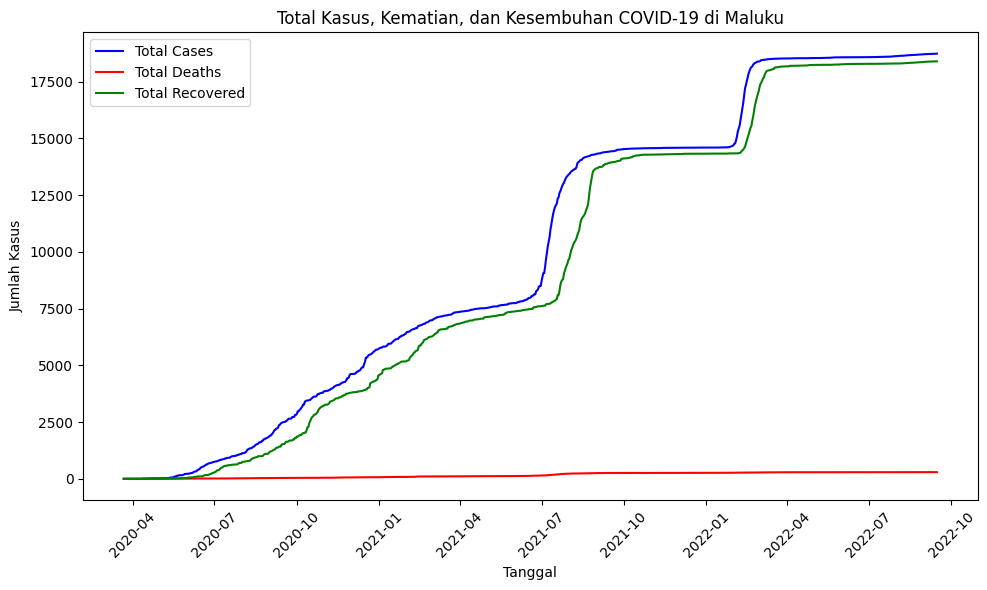

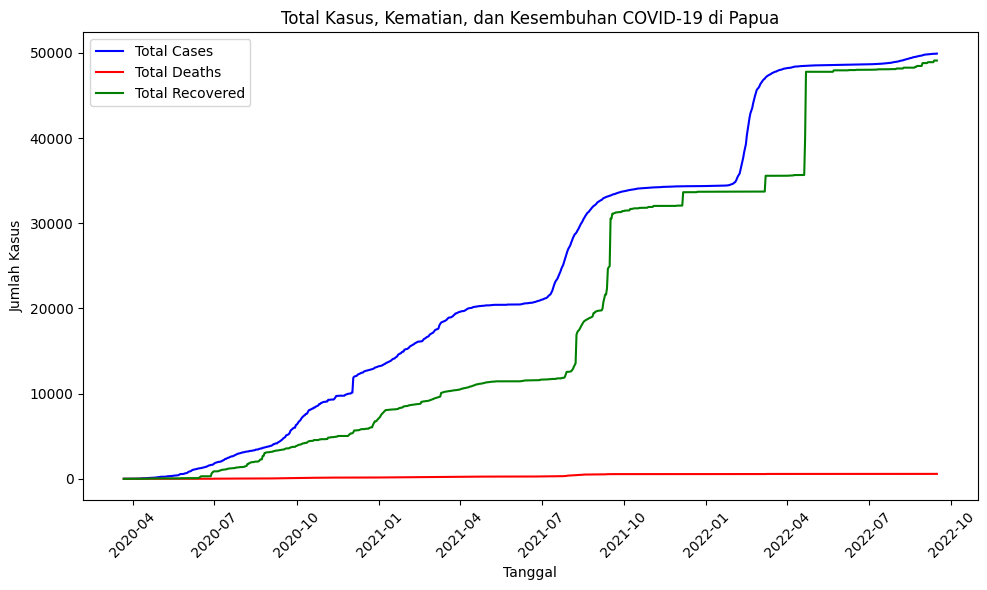

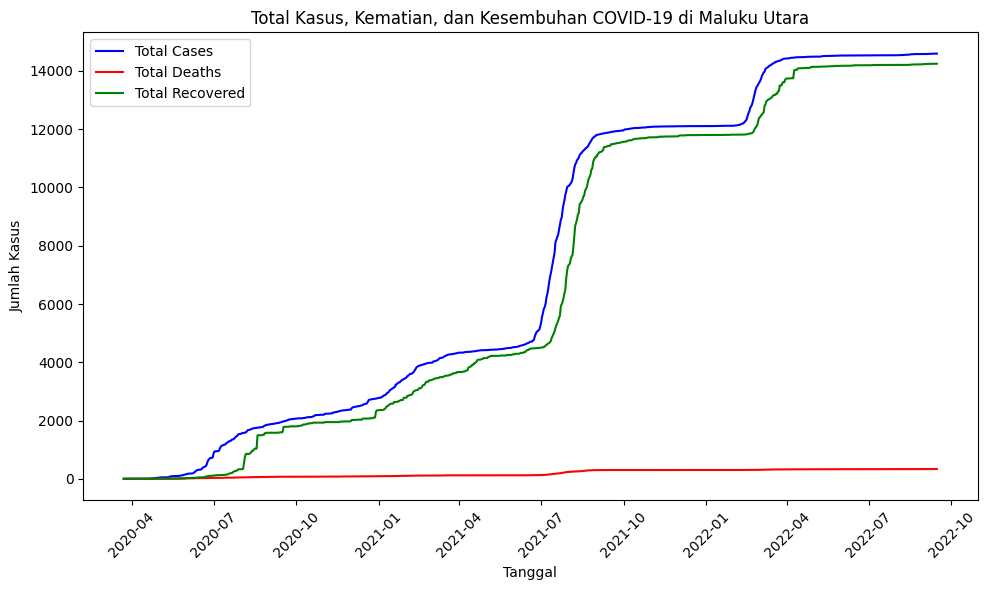

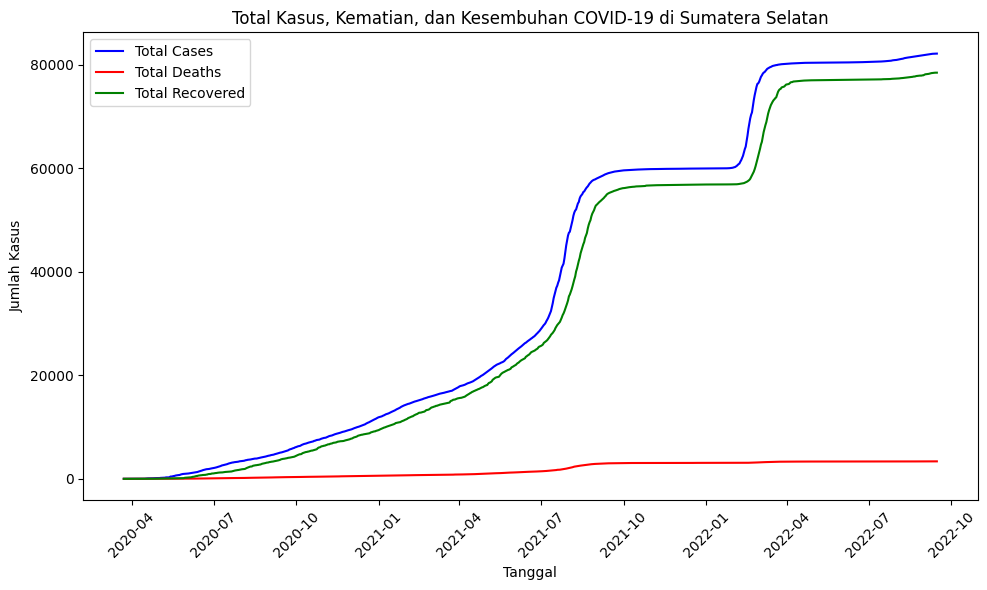

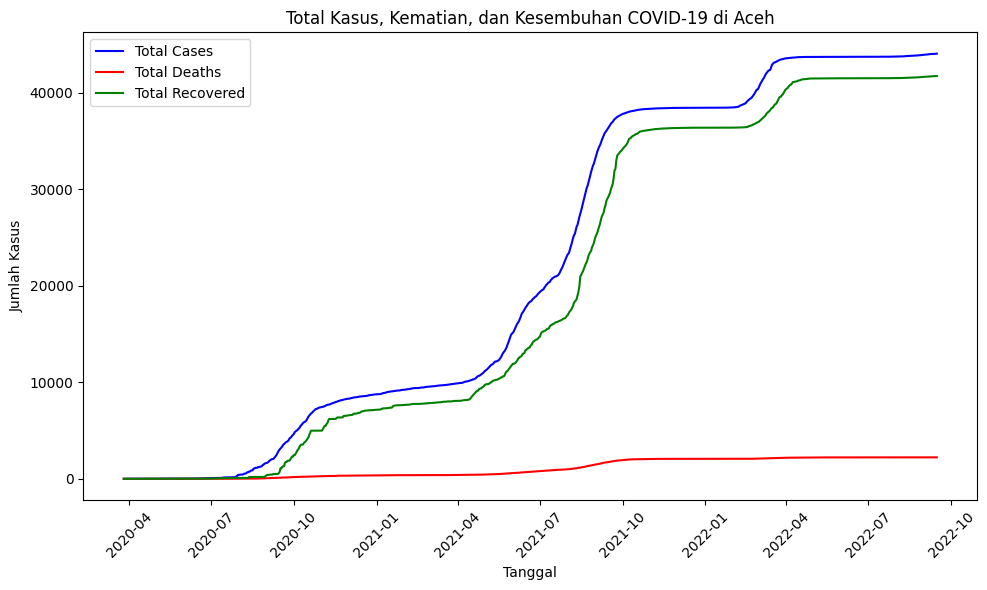

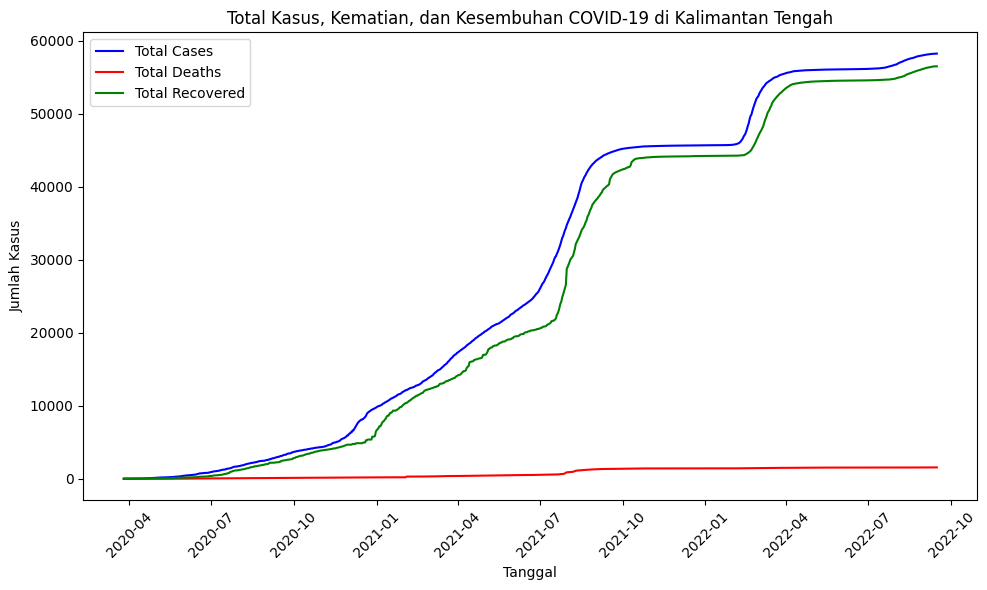

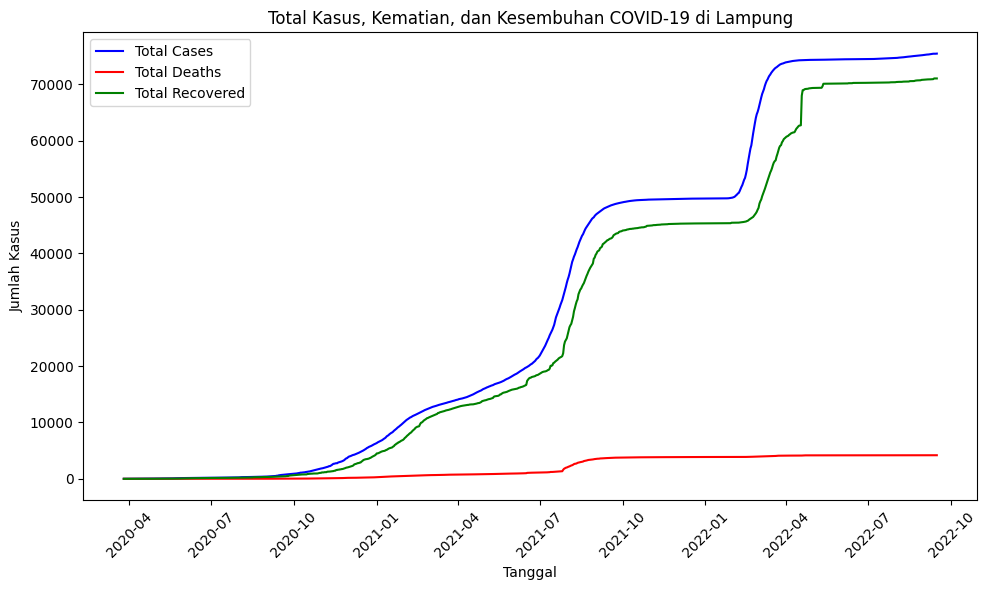

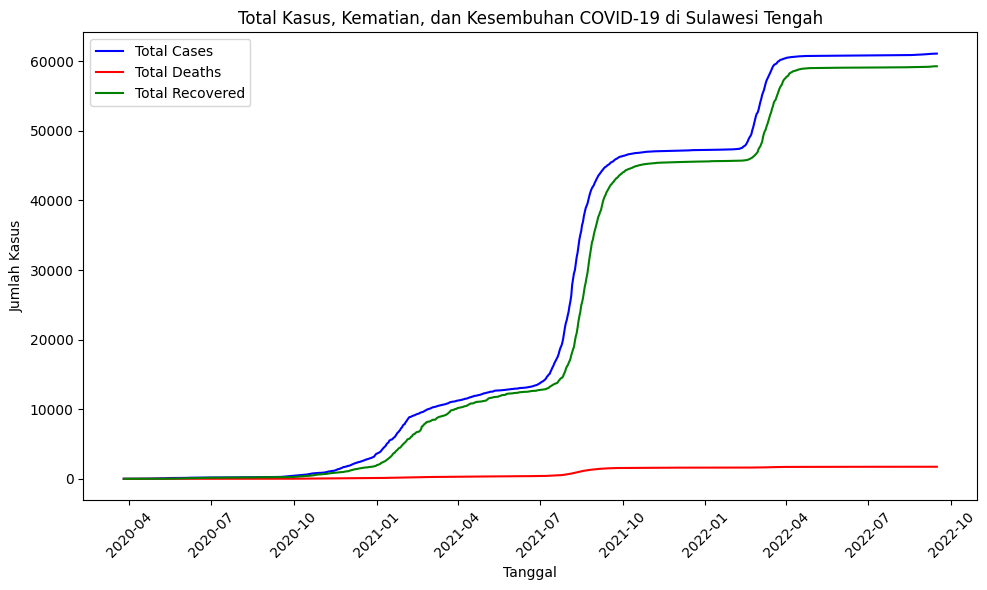

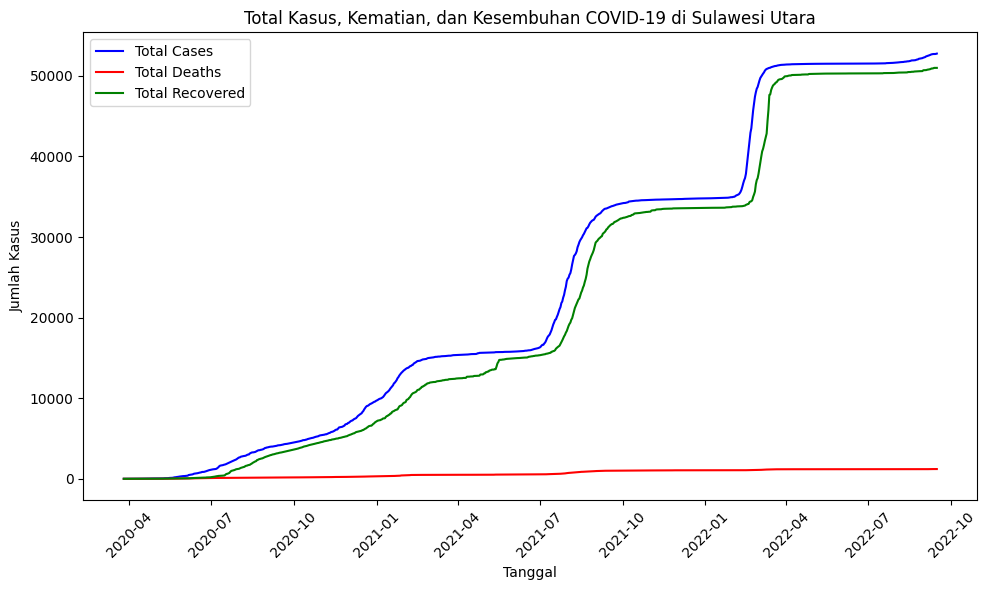

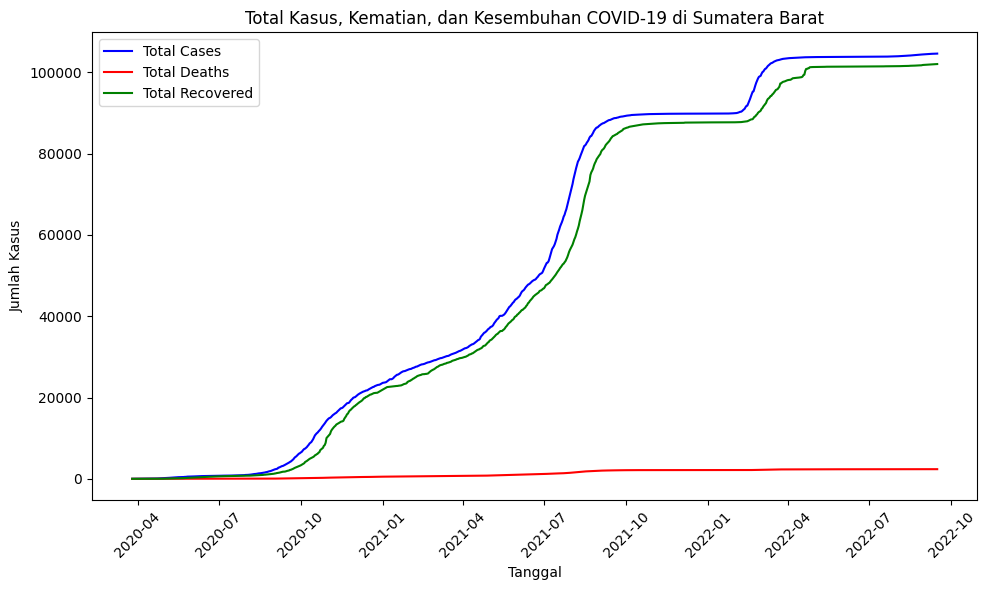

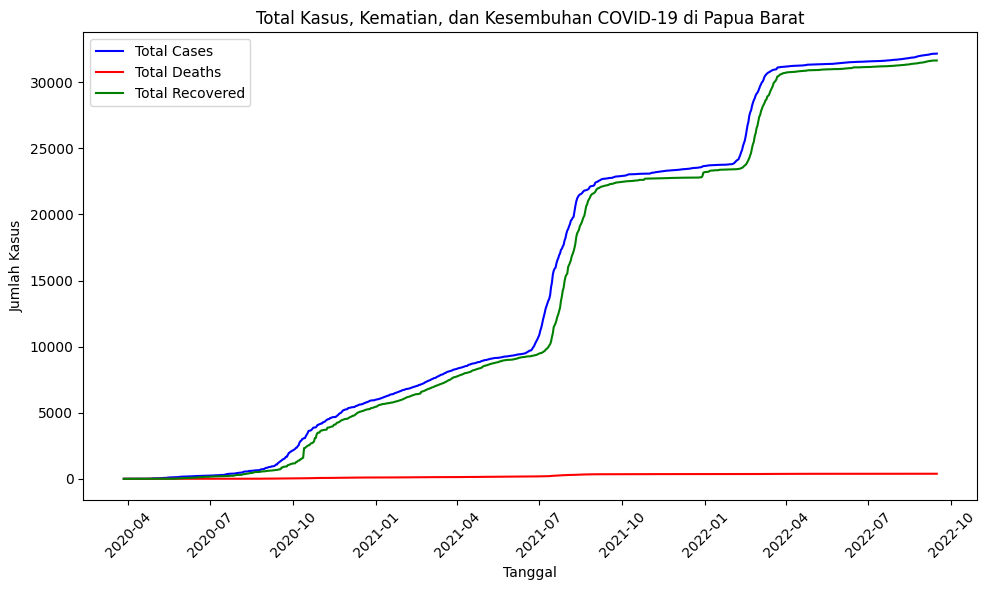

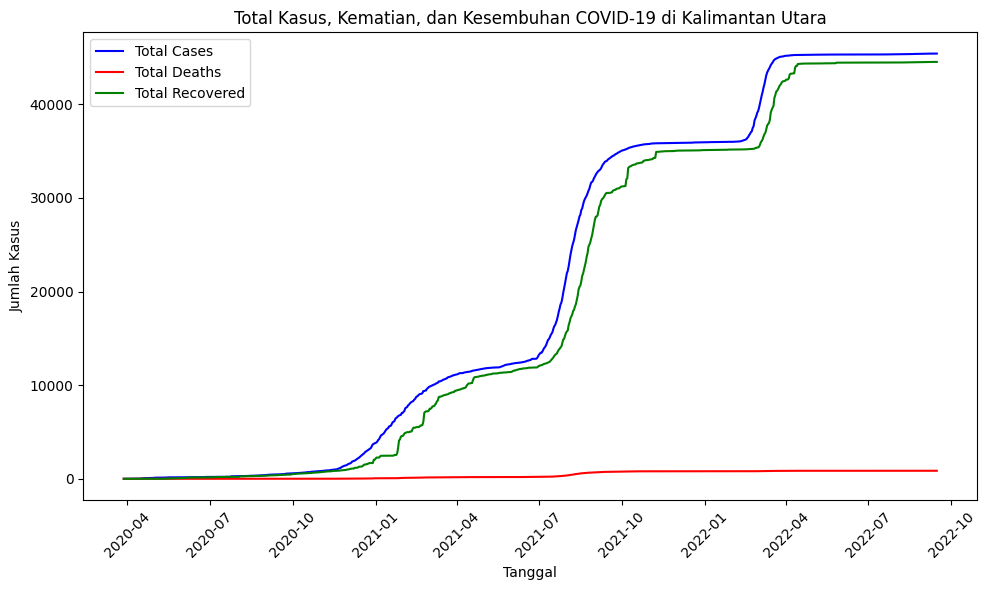

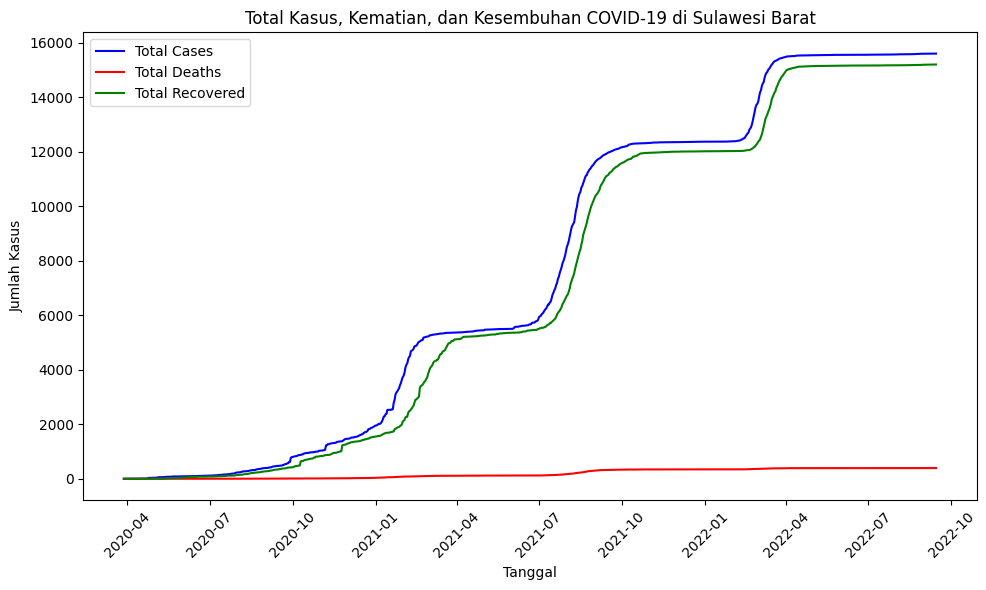

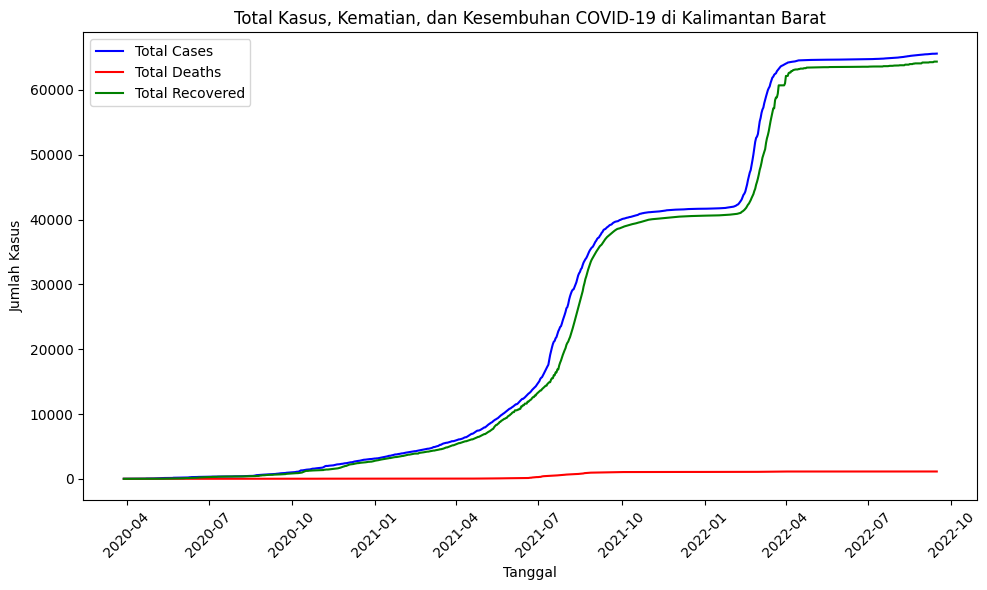

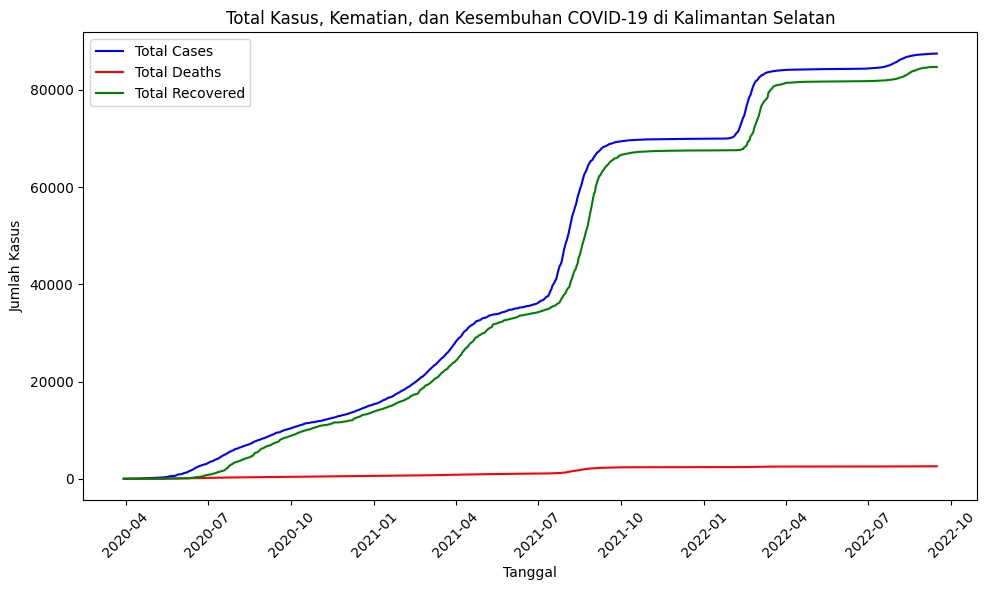

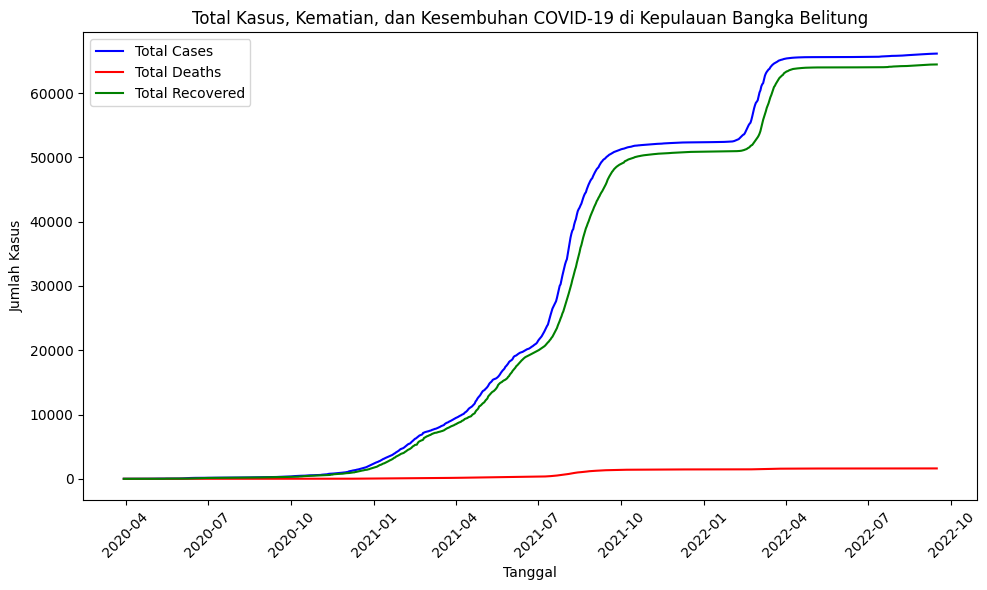

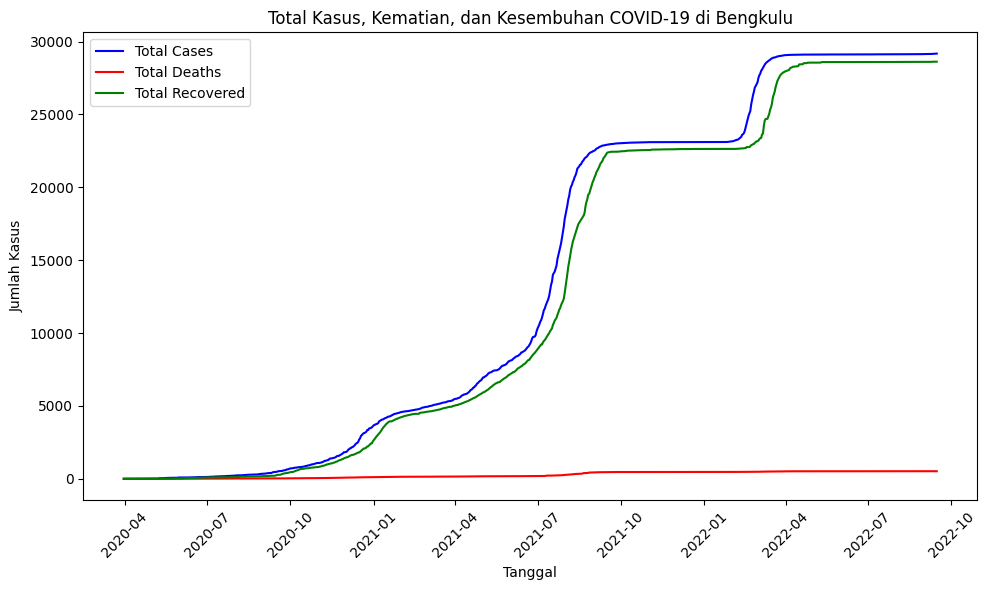

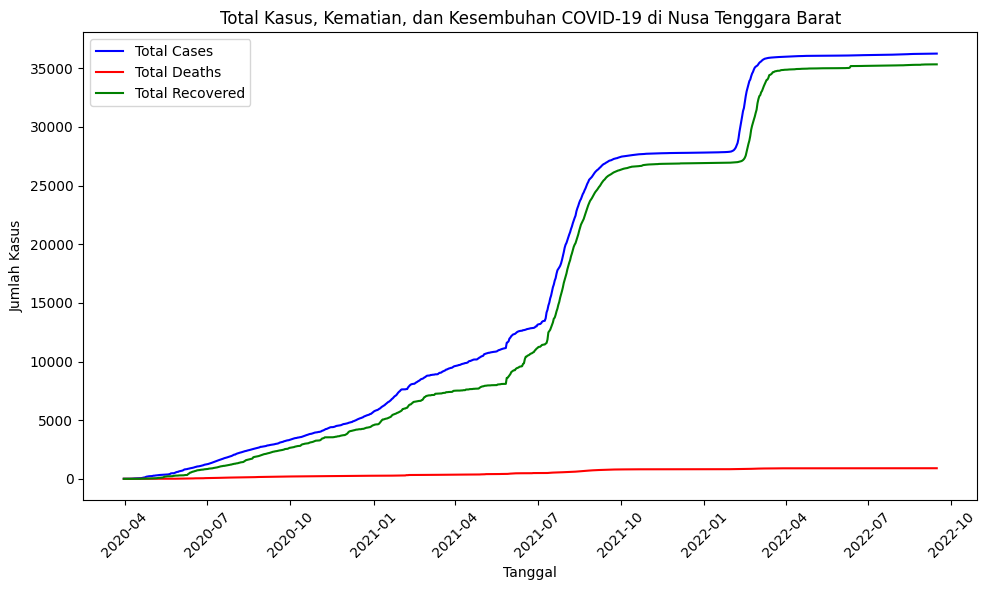

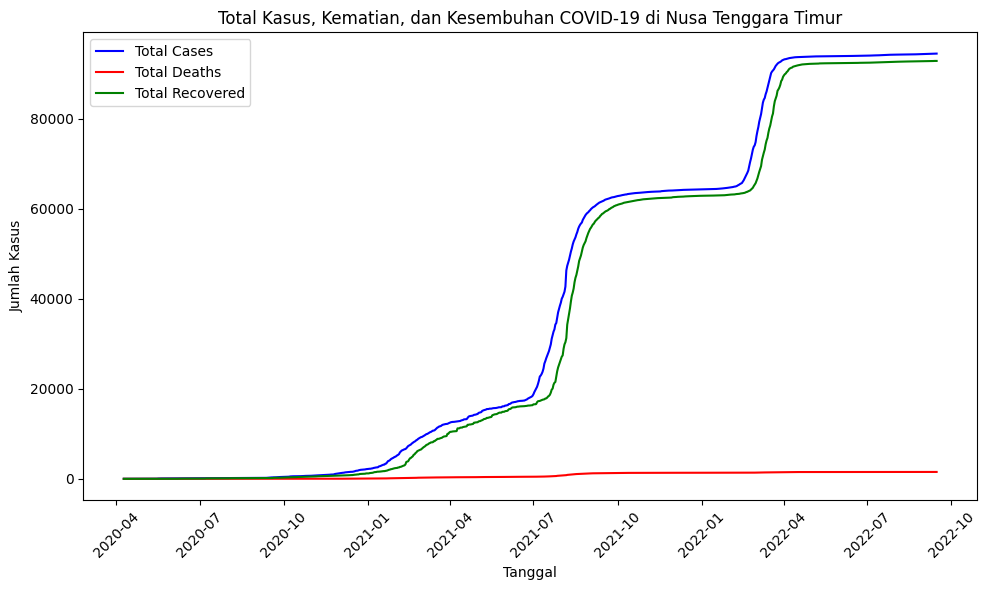

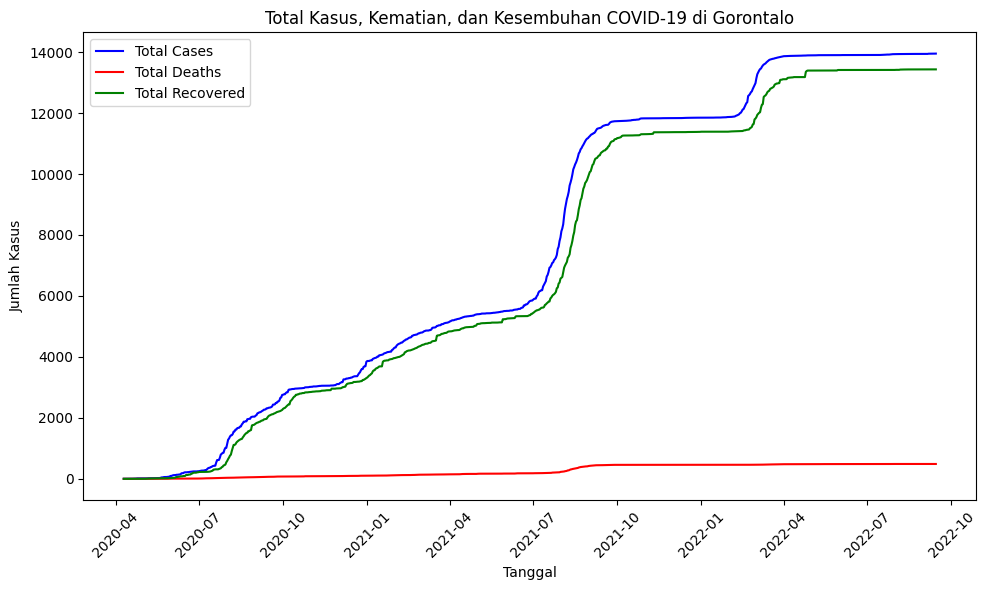

In [4]:
# Menampilkan data berdasarkan lokasi tertentu (misalnya DKI Jakarta)
df_locations = df['Location']
df_locations = df_locations.drop_duplicates()

for i in df_locations:
    location = i
    df_location = df[df['Location'] == location]

    # Tampilkan data untuk lokasi tersebut
    plt.figure(figsize=(10, 6))
    df_location_grouped = df_location.groupby('Date').sum()
    plt.plot(df_location_grouped.index, df_location_grouped['Total Cases'], label='Total Cases', color='blue')
    plt.plot(df_location_grouped.index, df_location_grouped['Total Deaths'], label='Total Deaths', color='red')
    plt.plot(df_location_grouped.index, df_location_grouped['Total Recovered'], label='Total Recovered', color='green')

    plt.title(f"Total Kasus, Kematian, dan Kesembuhan COVID-19 di {location}")
    plt.xlabel("Tanggal")
    plt.ylabel("Jumlah Kasus")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()